In [6]:
import csv
import numpy as np
import pandas as pd
from pathlib import Path

# Preprocessing

In [ ]:
df = pd.read_fwf('positive.txt', delimeter='\n', header=None)
data_pos = pd.DataFrame({'text':df[0], 'label':1})
pos_test_data = data_pos[:5000]
pos_train_data = data_pos[5000:]

df = pd.read_fwf('negative.txt', delimeter='\n', header=None)
data_neg = pd.DataFrame({'text':df[0], 'label':0})
neg_test_data = data_neg[:5000]
neg_train_data = data_neg[5000:]
neg_test_data

,text,label
0,Tommy Lee Jonesovi jsou role jako je tato šity...,0
1,se stejnou upřímností a váhou jako je Pravdivá...,0
2,Fakt blbost. 1. díl byl ucházející a dalo se n...,0
3,Jako mladíkovi uprostřed normalizačních sedmde...,0
4,...aneb proč neudělat ze Tří mušketyrů sci-fi....,0
...,...,...
4995,Odkud že to jen znám režiséra tohoto díla? Á u...,0
4996,"Ta hrůza, takový problémy bych chtěl mít. Kdy ...",0
4997,Sitcom? HAhahahahahahahahaha...dobrej vtip! Ně...,0
4998,Vrchol nevkusu! když si celej film zakládá pou...,0


- The first 5000 samples from both negative and positive are used as a test dataset, rest is train dataset

In [ ]:
#Create new dataset with positive and negative, then shuffle it a bit
from sklearn.utils import shuffle

train_dataset = pd.concat([pos_train_data, neg_train_data])
train_dataset = shuffle(train_dataset)
train_dataset.head()

,text,label
17418,Kriminálky odpad!,0
16884,Pro zbysik(a). No právě. Viděl a několik desít...,0
16556,"Už jednička stála v podstě za exkrement, dvojk...",0
10127,"Všechny Zemanovy filmy jsou pro mě jasných 5*,...",1
17556,V trezoru to nebylo jen tak pro nic za nic. Op...,1


In [ ]:
test_dataset = pd.concat([pos_test_data, neg_test_data])
test_dataset = shuffle(test_dataset)
test_dataset.head()

,text,label
3441,"Manga mě vždy dostanou, a tyhle patří k nejlep...",1
39,"Proboha, kdyby alespoň poprosili studenty z DA...",0
3104,"Obludně debilní nedokoukatelnost, navíc díky m...",0
117,"Jednou byl v zemi Teletubbies čas na pudink, a...",0
3589,"Nic proti fandům Lamase, ale na rozdíl od Dolp...",0


In [ ]:
train_dataset

,text,label
17418,Kriminálky odpad!,0
16884,Pro zbysik(a). No právě. Viděl a několik desít...,0
16556,"Už jednička stála v podstě za exkrement, dvojk...",0
10127,"Všechny Zemanovy filmy jsou pro mě jasných 5*,...",1
17556,V trezoru to nebylo jen tak pro nic za nic. Op...,1
...,...,...
22317,Viz komentář Eda S. Úžasná melancholická a hlu...,1
21424,musel jsem na to koukat s dědou :D,0
20363,Železný Jim opět zaúřadoval a podruhé ještě ús...,1
21768,"Výborný film, který je promyšlený do nejmenšíh...",1


In [ ]:
train_dataset.shape

(50613, 2)

In [ ]:
test_dataset

,text,label
3441,"Manga mě vždy dostanou, a tyhle patří k nejlep...",1
39,"Proboha, kdyby alespoň poprosili studenty z DA...",0
3104,"Obludně debilní nedokoukatelnost, navíc díky m...",0
117,"Jednou byl v zemi Teletubbies čas na pudink, a...",0
3589,"Nic proti fandům Lamase, ale na rozdíl od Dolp...",0
...,...,...
306,Animovaná adaptace Orwellova alegorického romá...,1
116,Céčkový film se špatným scénářem a režií. Here...,0
4527,Jáá se vrátím.... (a fakt nekecal),1
60,"Souhlasím, že z tohohle filmu se stal kult asi...",1


In [ ]:
#Saving both datasets as .csv
train_dataset.to_csv('train_data_csfd.csv',index=False)
test_dataset.to_csv('test_data_csfd.csv',index=False)

# Let's look at data

In [7]:
train_dataset = pd.read_csv('train_data_csfd.csv')

In [ ]:
df_number_of_categories = train_dataset.groupby(['label']).label.count().reset_index(name='Count')

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns 

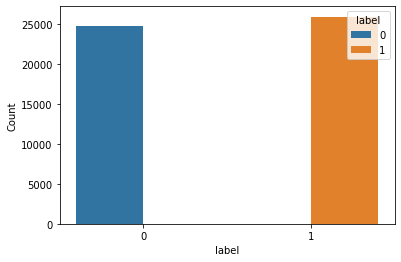

In [ ]:
sns.barplot(data=df_number_of_categories, y='Count', x='label', hue='label')

- The train dataset is almost balanced
- It contains two labels wherest **0 - negative**, **1 - positive**

In [ ]:
df_number_of_categories

,label,Count
0,0,24716
1,1,25897


- Test dataset is balanced with 5000 samples from negative and 5000 samples from positive

# Tokenize sentences and remove puncuation
- I won't be using this method later, but it's good for visual text analysis

In [1]:
import itertools
import nltk
from textblob import TextBlob

In [2]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [3]:
def form_sentence(tweet):
    tweet_blob = TextBlob(tweet)
    return tweet_blob.words

# Most common words in train dataset

In [8]:
train_dataset['Words'] = train_dataset['text'].apply(form_sentence)

In [9]:
words = list(itertools.chain(*train_dataset.Words))

In [10]:
word_freq = nltk.FreqDist(words)

In [ ]:
word_freq

In [ ]:
#How many unique words train dataset contains
len(word_freq)

197470

In [ ]:
#Longest movie review
max(train_dataset.Words.apply(len))

279

In [ ]:
#Average review length
train_dataset.Words.str.len().mean()

47.966214213739555

- The train dataset contains **197470** unique words
- The longest review is **279** words long
- The average review is **48** words long

# Histogram of words in review

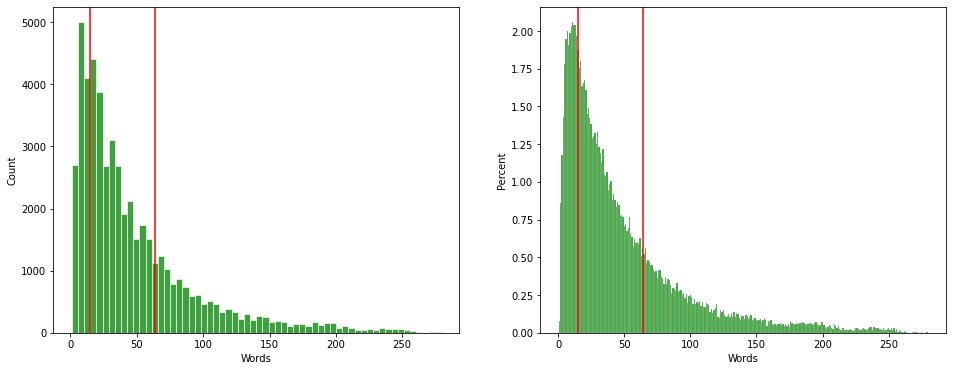

In [49]:
fig = plt.figure(figsize=(16,6))
fig = plt.subplot(1,2,1)
sns.histplot(train_dataset.Words.apply(len), bins=60, edgecolor='white', color='green')
plt.axvline(train_dataset.Words.apply(len).quantile(0.25), color='red')
plt.axvline(train_dataset.Words.apply(len).quantile(0.75), color='red')

fig = plt.subplot(1,2,2)
sns.histplot(train_dataset.Words.apply(len), bins=60, edgecolor='white', color='green', stat="percent", discrete=True)
plt.axvline(train_dataset.Words.apply(len).quantile(0.25), color='red')
plt.axvline(train_dataset.Words.apply(len).quantile(0.75), color='red')

- The interquartile range is between 16 and 64 words

# Let's create a Word Cloud for most common words

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

In [ ]:
#Scrapped czech stopwords from https://nlp.fi.muni.cz/cs/StopList, I wanted to look at more important words in text, so the stopwords are deleted from Word Cloud
stopwords = set(STOPWORDS)
stopwords.update(["br","a",	
"v",	
"se",	
"na",	
"je",	
"že",	
"o",
"s",
"z",
"do",	
"i",	
"to",	
"k",	
"ve",	
"pro",	
"za",	
"by",	
"ale",	
"si",	
"po",	
"jako",	
"podle",	
"od",	
"jsem",	
"tak",	
"jsou",	
"které",
"který",	
"jeho",	
"však",	
"bude",	
"nebo",	
"už",	
"jen",	
"byl",	
"jak",	
"u",	
"co",	
"při",	
"až",	
"aby",	
"má",	
"když",	
"než",	
"ze",	
"která",	
"před",	
"být",	
"také",	
"bylo",	
"jsme",	
"není",	
"jejich",	
"ještě",	
"ani",	
"mezi",	
"byla",	
"své",
"roku",	
"již",	
"pak",	
"první",	
"roce",	
"kteří",	
"další",	
"proti",	
"let",	
"tím",	
"může",	
"korun",
"řekl",
"tom",
"kde",
"či",
"tedy",
"pouze"])


# With Stopwords

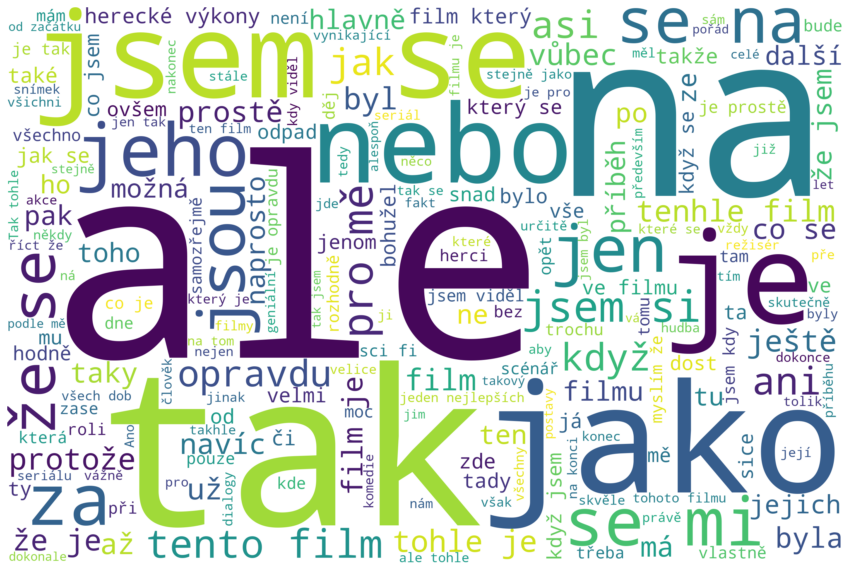

In [ ]:
text = " ".join(review for review in train_dataset.text)

wordcloud = WordCloud(width= 3000, height = 2000,background_color="white").generate(text)

plt.figure(figsize=(15,11))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.show()

The word cloud contains alot of stopwords

# After deleting of some Stopwords

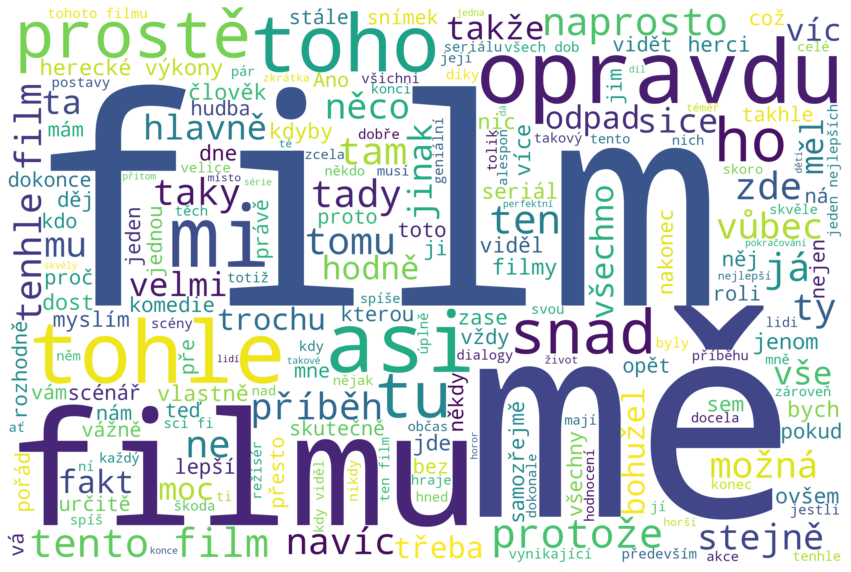

In [ ]:
text = " ".join(review for review in train_dataset.text)

wordcloud = WordCloud(stopwords=stopwords, width= 3000, height = 2000,background_color="white").generate(text)

plt.figure(figsize=(15,11))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.show()

As you can see, the common words look familier when describing a movie 